<a href="https://colab.research.google.com/github/Annemarie535257/Agriempower_model_trainning/blob/main/Summative_Intro_to_ml_Anne_Marie_Twagirayezu_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    precision_score, classification_report, confusion_matrix
)
import joblib

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Input

from IPython.display import Image

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [ ]:

# === Load Data ===
df = pd.read_csv('loan_data.csv')

# === Encoding Functions ===
def encode_approval(df: pd.DataFrame) -> pd.DataFrame:
    df['Approval'] = df['Approval'].map({'Rejected': 0, 'Approved': 1})
    return df

def encode_employment(df: pd.DataFrame) -> pd.DataFrame:
    df['Employment_Status'] = df['Employment_Status'].map({'unemployed': 0, 'employed': 1})
    return df

# === Apply Encodings Immediately After Loading ===
df = encode_approval(df)
df = encode_employment(df)

# === Drop Unused Columns ===
df = df.drop(columns=['Text'])

# === Define Target & Features ===
y = df['Approval']
X = df.drop(columns=['Approval'])
X = pd.get_dummies(X, drop_first=True)

# === Split into Train / Validation / Test Sets ===
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765,
    random_state=42, stratify=y_train_val
)


# === Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://drive.google.com/uc?export=view&id=1LDMVFV4DMOucexBFI3ruLVJummWO4jId" alt="Model Architecture" style="width:25px"/>





#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
def define_model(
    input_shape,
    use_optimization=False,
    optimizer_name='adam',
    regularization_type=None,
    dropout_rate=0.0,
    learning_rate=0.001,
    early_stopping=False,
    layers=[64, 32, 16],
    epochs=100
):
    # === Optimizer Setup ===
    if use_optimization:
        if optimizer_name.lower() == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer_name.lower() == 'rmsprop':
            optimizer = RMSprop(learning_rate=learning_rate)
        else:
            raise ValueError("Unsupported optimizer.")
    else:
        optimizer = 'adam'  # default, no customization

    # === Regularization Setup ===
    if use_optimization:
        if regularization_type == 'l1':
            regularizer = l1(0.01)
        elif regularization_type == 'l2':
            regularizer = l2(0.01)
        else:
            regularizer = None
    else:
        regularizer = None

    # === Build Model ===
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Explicit input layer

    for units in layers:
        model.add(Dense(units, activation='relu', kernel_regularizer=regularizer))
        if use_optimization and dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # === Compile ===
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # === Callbacks ===
    callbacks = []
    if use_optimization and early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    # === Train ===
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=epochs,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    return model, history


#Logic regression model

In [ ]:


def model_1(X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Trains and evaluates a Logistic Regression model on scaled data.

    Returns:
        model_lr: trained logistic regression model
        y_pred: binary predictions on test set
        metrics: dict of accuracy, f1, recall, precision
    """

    # === Train Logistic Regression Model ===
    model_lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    model_lr.fit(X_train_scaled, y_train)

    # === Predict on test set ===
    y_pred = model_lr.predict(X_test_scaled)

    # === Compute metrics ===
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # === Display results ===
    print("\n✅ Logistic Regression Results (model_1):")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Precision: {precision:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Rejected (0)', 'Approved (1)']))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nApproved Loans: {np.sum(y_pred == 1)}")
    print(f"Rejected Loans: {np.sum(y_pred == 0)}")

    # === Save model ===
    save_path = "saved_models/logistic_regression_model.pkl"
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    joblib.dump(model_lr, save_path)
    print(f"\n📦 model_1 saved at: {save_path}")

    # === Return everything for reuse ===
    metrics = {
        'accuracy': accuracy,
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

    return model_lr, y_pred, metrics


In [ ]:
model_lr, y_pred, metrics = model_1(X_train_scaled, X_test_scaled, y_train, y_test)



✅ Logistic Regression Results (model_1):
Accuracy:  0.9264
F1 Score:  0.7782
Recall:    0.7881
Precision: 0.7686

Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.96      0.95      0.96      3010
Approved (1)       0.77      0.79      0.78       590

    accuracy                           0.93      3600
   macro avg       0.86      0.87      0.87      3600
weighted avg       0.93      0.93      0.93      3600


Confusion Matrix:
[[2870  140]
 [ 125  465]]

Approved Loans: 605
Rejected Loans: 2995

📦 model_1 saved at: saved_models/logistic_regression_model.pkl


# Task: Print out the Final Model Accuracy and plot the Loss curve

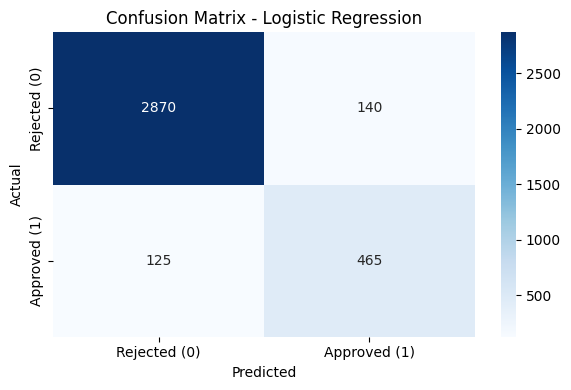

In [ ]:

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
class_names = ['Rejected (0)', 'Approved (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8216 - loss: 1.1192 - val_accuracy: 0.9195 - val_loss: 0.3299
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8911 - loss: 0.3724 - val_accuracy: 0.9489 - val_loss: 0.3103
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9022 - loss: 0.3531 - val_accuracy: 0.9539 - val_loss: 0.2954
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9005 - loss: 0.3428 - val_accuracy: 0.9581 - val_loss: 0.2774
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9046 - loss: 0.3360 - val_accuracy: 0.9511 - val_loss: 0.2853
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9015 - loss: 0.3344 - val_accuracy: 0.9617 - val_loss: 0.2758
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9034 - loss: 0.3304 - val_accuracy: 0.9583 - val_loss: 0.2674
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9079 - loss: 0.3187 - val_accu

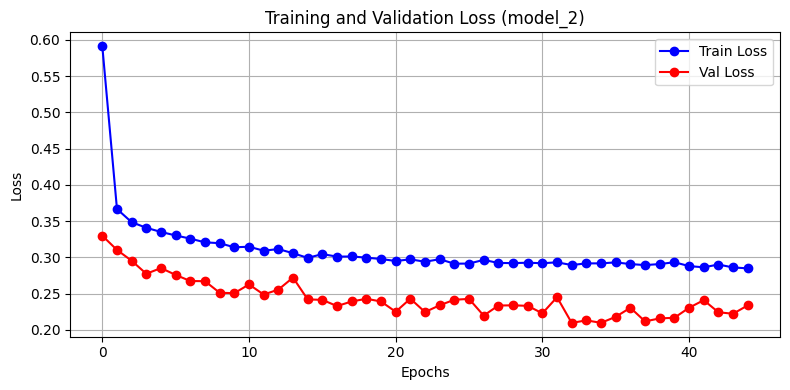


Results for model_2 (Optimized Neural Network with 64-unit layer):
Accuracy:  0.9794
F1 Score:  0.9378
Recall:    0.9458
Precision: 0.9300

Confusion Matrix:
[[2968   42]
 [  32  558]]

Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.99      0.99      0.99      3010
Approved (1)       0.93      0.95      0.94       590

    accuracy                           0.98      3600
   macro avg       0.96      0.97      0.96      3600
weighted avg       0.98      0.98      0.98      3600



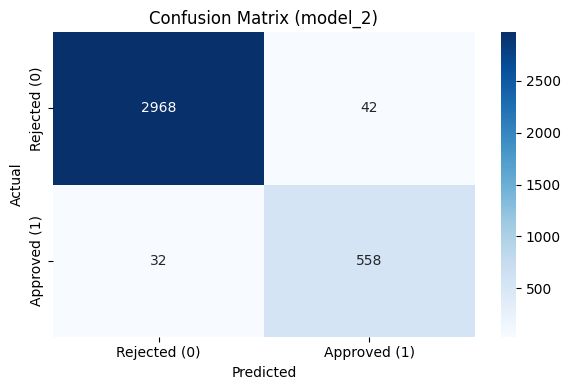


✅ model_2 has been saved to: saved_models/Adam_l1_model.keras


In [ ]:
# === 1. Define model_2 with additional first Dense(64) layer ===

model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# === 2. Compile the model ===
model_2.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === 3. Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# === 4. Train the model ===
history_2 = model_2.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 5. Plot training and validation loss ===
plt.figure(figsize=(8, 4))
plt.plot(history_2.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_2.history['val_loss'], 'ro-', label='Val Loss')
plt.title('Training and Validation Loss (model_2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Evaluate the model on the test set ===
y_pred2 = (model_2.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

accuracy_2 = accuracy_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)

print(f"\nResults for model_2 (Optimized Neural Network with 64-unit layer):")
print(f"Accuracy:  {accuracy_2:.4f}")
print(f"F1 Score:  {f1_2:.4f}")
print(f"Recall:    {recall_2:.4f}")
print(f"Precision: {precision_2:.4f}")

# === 7. Confusion Matrix ===
cm2 = confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix:")
print(cm2)

print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=['Rejected (0)', 'Approved (1)']))

# === 8. Plot confusion matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix (model_2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# === 9. Save the model ===
save_path = "saved_models/Adam_l1_model.keras"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model_2.save(save_path)

print(f"\n✅ model_2 has been saved to: {save_path}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8981 - loss: 0.5100 - val_accuracy: 0.9595 - val_loss: 0.1802
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9615 - loss: 0.1820 - val_accuracy: 0.9750 - val_loss: 0.1496
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9656 - loss: 0.1645 - val_accuracy: 0.9645 - val_loss: 0.1492
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1542 - val_accuracy: 0.9828 - val_loss: 0.1288
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9688 - loss: 0.1479 - val_accuracy: 0.9811 - val_loss: 0.1241
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9683 - loss: 0.1415 - val_accuracy: 0.9722 - val_loss: 0.1260
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9705 - loss: 0.1359 - val_accuracy: 0.9736 - val_loss: 0.1212
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9723 - loss: 0.1304 - val_accuracy: 0.9786

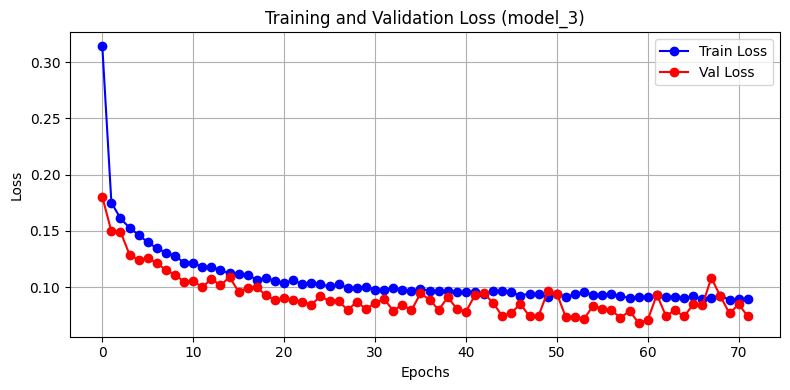


Results for model_3 (RMSprop + L2):
Accuracy:  0.9931
F1 Score:  0.9789
Recall:    0.9847
Precision: 0.9732

Confusion Matrix:
[[2994   16]
 [   9  581]]

Classification Report:
              precision    recall  f1-score   support

Rejected (0)       1.00      0.99      1.00      3010
Approved (1)       0.97      0.98      0.98       590

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600



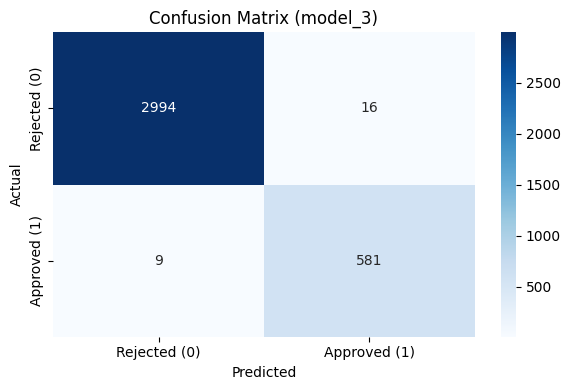


✅ model_3 has been saved to: saved_models/RMSprop_l2_model.keras


In [ ]:
# === 1. Define model_3 with RMSprop optimizer and L2 regularization ===

model_3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# === 2. Compile model ===
model_3.compile(
    optimizer=RMSprop(learning_rate=0.002),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === 3. Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# === 4. Train model ===
history_3 = model_3.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 5. Plot training and validation loss ===
plt.figure(figsize=(8, 4))
plt.plot(history_3.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_3.history['val_loss'], 'ro-', label='Val Loss')
plt.title('Training and Validation Loss (model_3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Evaluate on test set ===
y_pred3 = (model_3.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

accuracy_3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
recall_3 = recall_score(y_test, y_pred3)
precision_3 = precision_score(y_test, y_pred3)

print(f"\nResults for model_3 (RMSprop + L2):")
print(f"Accuracy:  {accuracy_3:.4f}")
print(f"F1 Score:  {f1_3:.4f}")
print(f"Recall:    {recall_3:.4f}")
print(f"Precision: {precision_3:.4f}")

# === 7. Confusion Matrix ===
cm3 = confusion_matrix(y_test, y_pred3)
print("\nConfusion Matrix:")
print(cm3)

print("\nClassification Report:")
print(classification_report(y_test, y_pred3, target_names=['Rejected (0)', 'Approved (1)']))

# === 8. Plot confusion matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix (model_3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# === 9. Save model ===
save_path = "saved_models/RMSprop_l2_model.keras"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model_3.save(save_path)

print(f"\n✅ model_3 has been saved to: {save_path}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8053 - loss: 4.1240 - val_accuracy: 0.8362 - val_loss: 2.9634
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8422 - loss: 2.6866 - val_accuracy: 0.8381 - val_loss: 1.8819
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8657 - loss: 1.7090 - val_accuracy: 0.8528 - val_loss: 1.1629
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8633 - loss: 1.0673 - val_accuracy: 0.8495 - val_loss: 0.7420
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8595 - loss: 0.7206 - val_accuracy: 0.8414 - val_loss: 0.5556
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8649 - loss: 0.5620 - val_accuracy: 0.8531 - val_loss: 0.4678
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8680 - loss: 0.4913 - val_accuracy: 0.8525 - val_loss: 0.4196
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8674 - loss: 0.4583 - val_accuracy: 0.8700

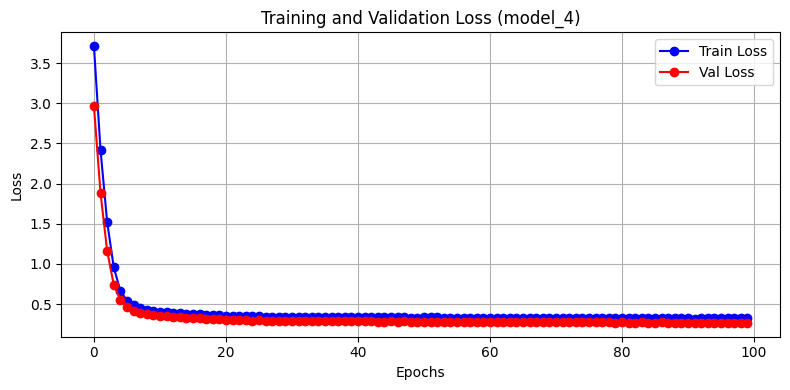


Results for model_4 (SGD + L1):
Accuracy:  0.9631
F1 Score:  0.8807
Recall:    0.8322
Precision: 0.9352

Confusion Matrix:
[[2976   34]
 [  99  491]]

Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.97      0.99      0.98      3010
Approved (1)       0.94      0.83      0.88       590

    accuracy                           0.96      3600
   macro avg       0.95      0.91      0.93      3600
weighted avg       0.96      0.96      0.96      3600



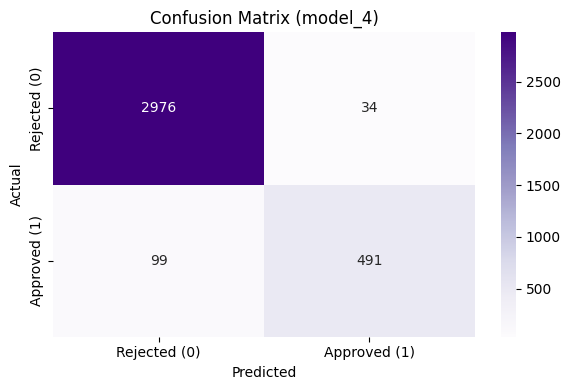


✅ model_4 has been saved to: saved_models/SGD_l1_model.keras


In [ ]:
model_4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_4.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

history_4 = model_4.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

plt.figure(figsize=(8, 4))
plt.plot(history_4.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_4.history['val_loss'], 'ro-', label='Val Loss')
plt.title('Training and Validation Loss (model_4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_pred4 = (model_4.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

accuracy_4 = accuracy_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)
recall_4 = recall_score(y_test, y_pred4)
precision_4 = precision_score(y_test, y_pred4)

print(f"\nResults for model_4 (SGD + L1):")
print(f"Accuracy:  {accuracy_4:.4f}")
print(f"F1 Score:  {f1_4:.4f}")
print(f"Recall:    {recall_4:.4f}")
print(f"Precision: {precision_4:.4f}")

cm4 = confusion_matrix(y_test, y_pred4)
print("\nConfusion Matrix:")
print(cm4)

print("\nClassification Report:")
print(classification_report(y_test, y_pred4, target_names=['Rejected (0)', 'Approved (1)']))

plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix (model_4)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

save_path = "saved_models/SGD_l1_model.keras"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model_4.save(save_path)

print(f"\n✅ model_4 has been saved to: {save_path}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8197 - loss: 1.0221 - val_accuracy: 0.9525 - val_loss: 0.5848
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9317 - loss: 0.5666 - val_accuracy: 0.9592 - val_loss: 0.4046
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9434 - loss: 0.4081 - val_accuracy: 0.9653 - val_loss: 0.3082
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9486 - loss: 0.3256 - val_accuracy: 0.9697 - val_loss: 0.2542
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9522 - loss: 0.2684 - val_accuracy: 0.9717 - val_loss: 0.2231
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9555 - loss: 0.2432 - val_accuracy: 0.9725 - val_loss: 0.2050
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9537 - loss: 0.2284 - val_accuracy: 0.9714 - val_loss: 0.1942
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9581 - loss: 0.2125 - val_accuracy: 0.9711

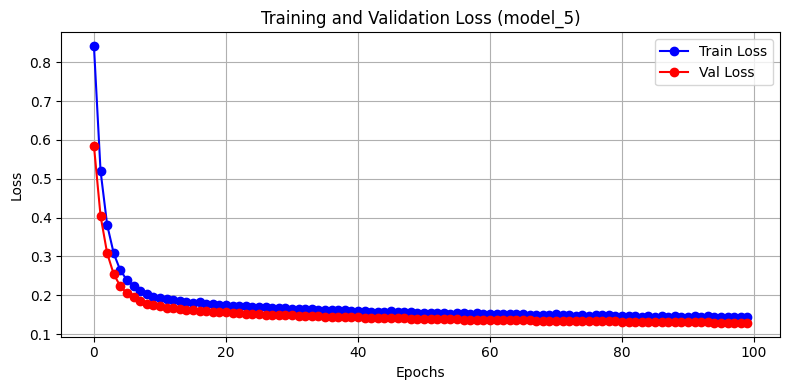


Results for model_5 (Adagrad + L2):
Accuracy:  0.9856
F1 Score:  0.9554
Recall:    0.9441
Precision: 0.9670

Confusion Matrix:
[[2991   19]
 [  33  557]]

Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.99      0.99      0.99      3010
Approved (1)       0.97      0.94      0.96       590

    accuracy                           0.99      3600
   macro avg       0.98      0.97      0.97      3600
weighted avg       0.99      0.99      0.99      3600



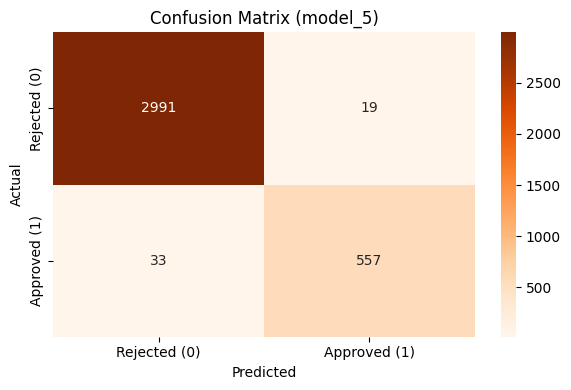


✅ model_5 has been saved to: saved_models/Adagrad_l2_model.keras


In [ ]:
from tensorflow.keras.optimizers import Adagrad

# === 1. Define model_5 ===
model_5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# === 2. Compile the model ===
model_5.compile(
    optimizer=Adagrad(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === 3. Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# === 4. Train the model ===
history_5 = model_5.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 5. Plot training and validation loss ===
plt.figure(figsize=(8, 4))
plt.plot(history_5.history['loss'], 'bo-', label='Train Loss')
plt.plot(history_5.history['val_loss'], 'ro-', label='Val Loss')
plt.title('Training and Validation Loss (model_5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Evaluate on test set ===
y_pred5 = (model_5.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

accuracy_5 = accuracy_score(y_test, y_pred5)
f1_5 = f1_score(y_test, y_pred5)
recall_5 = recall_score(y_test, y_pred5)
precision_5 = precision_score(y_test, y_pred5)

print(f"\nResults for model_5 (Adagrad + L2):")
print(f"Accuracy:  {accuracy_5:.4f}")
print(f"F1 Score:  {f1_5:.4f}")
print(f"Recall:    {recall_5:.4f}")
print(f"Precision: {precision_5:.4f}")

# === 7. Confusion Matrix ===
cm5 = confusion_matrix(y_test, y_pred5)
print("\nConfusion Matrix:")
print(cm5)

print("\nClassification Report:")
print(classification_report(y_test, y_pred5, target_names=['Rejected (0)', 'Approved (1)']))

# === 8. Plot confusion matrix ===
plt.figure(figsize=(6, 4))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title('Confusion Matrix (model_5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# === 9. Save the model ===
save_path = "saved_models/Adagrad_l2_model.keras"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
model_5.save(save_path)

print(f"\n✅ model_5 has been saved to: {save_path}")


In [ ]:
# === Compare All Models and Identify the Best ===

models = {
    'model_1': model_lr,  # scikit-learn
    'model_2': model_2,   # keras
    'model_3': model_3,
    'model_4': model_4,
    'model_5': model_5
}

metrics_summary = {}
best_name = None
best_acc = 0.0

print("Model Performance on Test Set:\n" + "-" * 72)
print(f"{'Model':<25} | {'Accuracy':<9} | {'F1 Score':<8} | {'Recall':<7} | {'Precision'}")
print("-" * 72)

for name, mdl in models.items():
    # Make predictions
    if name == 'model_1':
        y_pred = mdl.predict(X_test_scaled)  # scikit-learn
    else:
        y_pred = (mdl.predict(X_test_scaled, verbose=0) > 0.5).astype(int)  # keras

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Store in dictionary
    metrics_summary[name] = {
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

    # Print formatted row
    print(f"{name:<25} | {acc:<9.4f} | {f1:<8.4f} | {recall:<7.4f} | {precision:.4f}")

    # Track best model
    if acc > best_acc:
        best_acc = acc
        best_name = name

print("-" * 72)
print(f"✅ Best model is **{best_name}** with Test Accuracy = {best_acc:.4f}")


Model Performance on Test Set:
------------------------------------------------------------------------
Model                     | Accuracy  | F1 Score | Recall  | Precision
------------------------------------------------------------------------
model_1                   | 0.9264    | 0.7782   | 0.7881  | 0.7686
model_2                   | 0.9794    | 0.9378   | 0.9458  | 0.9300
model_3                   | 0.9931    | 0.9789   | 0.9847  | 0.9732
model_4                   | 0.9631    | 0.8807   | 0.8322  | 0.9352
model_5                   | 0.9856    | 0.9554   | 0.9441  | 0.9670
------------------------------------------------------------------------
✅ Best model is **model_3** with Test Accuracy = 0.9931


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):
    # 1. Load the model
    model = load_model(model_path)

    # 2. Predict probabilities
    y_prob = model.predict(X)

    # 3. Threshold to binary
    y_pred = (y_prob > 0.5).astype(int).flatten()

    return y_pred

# === Automatically Use the Best Model from Previous Comparison ===
model_path = f"saved_models/RMSprop_l2_model.keras"

# 4. Predict on the test set
y_pred_best = make_predictions(model_path, X_test_scaled)

# 5. Count approved and rejected loans
n_approved = np.sum(y_pred_best == 1)
n_rejected = np.sum(y_pred_best == 0)

print(f"\n📊 Loan Approval Summary (Best Model Predictions):")
print(f"Approved Loans : {n_approved}")
print(f"Rejected Loans : {n_rejected}")

# 6. Evaluation: Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Best Model):")
print(cm_best)

# 7. Evaluation: F1 Score
f1_best = f1_score(y_test, y_pred_best)
print(f"\nF1 Score (Best Model): {f1_best:.4f}")

# 8. Evaluation: Full classification report
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=['Rejected (0)', 'Approved (1)']))


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Loan Approval Summary (Best Model Predictions):
Approved Loans : 597
Rejected Loans : 3003

Confusion Matrix (Best Model):
[[2994   16]
 [   9  581]]

F1 Score (Best Model): 0.9789

Classification Report (Best Model):
              precision    recall  f1-score   support

Rejected (0)       1.00      0.99      1.00      3010
Approved (1)       0.97      0.98      0.98       590

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600



Congratulations!!
